## Hough transform on all the pages contained in "Untitled Folder 1"
As there's no exception to prevent error, if the page is seen as empty by the algo, the program will crash 

In [6]:
import cv2
import numpy as np
import glob
for n in glob.glob("Untitled Folder 1/*.png"):

    img = cv2.imread(n)
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


    cv2.imshow('image', img)
    
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()


### Algo to resize an image 

In [4]:
import cv2

def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [1]:
import glob
import cv2

for img in glob.glob("Untitled Folder/*.png"):
    n= cv2.imread(img)
    cv2.imshow('image', n)
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()

### Here i was testing the variables on one page by changing either the threshold or else using "for n in range(..,..,..)" 

In [ ]:
import cv2
import numpy as np
import glob

for n in range(1,2,1):

    img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 370)

    ##This is the size of the page, Here im drawing lines that will be as long as the size of the page 
    n = 2468 
    m = 3488
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m  * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


    cv2.imshow('image', img)
    
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0) 
    cv2.destroyAllWindows()


### Below is the bench of test i did 

In [15]:
###PARAM changes : thres = 270  n = 2468 m = 3488 length & width of document 
import cv2
import numpy as np
import glob
for n in glob.glob("Untitled Folder/*.png"):

    img = cv2.imread(n)
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    
    for n in range(1,100,10):


        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        cv2.imshow('edges', edges)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 270+n)

        n = 2468
        m = 3488
        for line in lines:
            rho,theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
            x1 = int(x0 + n * (-b))
            # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
            y1 = int(y0 + m * (a))
            # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
            x2 = int(x0 - n * (-b))
            # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
            y2 = int(y0 - m  * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


        cv2.imshow('image', img)

        #cv2.imwrite(n, img); 
        k = cv2.waitKey(0)
        cv2.destroyAllWindows()


In [1]:
###PARAM changes : lenght of lines drawn : no impact on result except the lenght of the line drawn 
import cv2
import numpy as np
import glob
for n in glob.glob("Untitled Folder/*.png"):

    img = cv2.imread(n)
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    
    for n in range(500,2500,500):


        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        cv2.imshow('edges', edges)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 700)
       # n = 2468
       # m = 3488
        l = 500 + n
        m = 500 + n
        for line in lines:
            rho,theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
            x1 = int(x0 + l * (-b))
            # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
            y1 = int(y0 + m * (a))
            # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
            x2 = int(x0 - l * (-b))
            # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
            y2 = int(y0 - m  * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


        cv2.imshow('image', img)

        #cv2.imwrite(n, img); 
        k = cv2.waitKey(0)
        cv2.destroyAllWindows()


TypeError: 'NoneType' object is not iterable

In [ ]:
###PARAM changes : Changing threshold n = 2468 m = 3488 length & width of document 
import cv2
import numpy as np
import glob
for n in glob.glob("Untitled Folder/*.png"):

    img = cv2.imread(n)
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    
    for n in range(1,100,10):


        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)
        cv2.imshow('edges', edges)
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 270+n)

        n = 2468
        m = 3488
        for line in lines:
            rho,theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
            x1 = int(x0 + n * (-b))
            # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
            y1 = int(y0 + m * (a))
            # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
            x2 = int(x0 - n * (-b))
            # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
            y2 = int(y0 - m  * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


        cv2.imshow('image', img)

        #cv2.imwrite(n, img); 
        k = cv2.waitKey(0)

In [22]:
##Change threshold according to page 8 
import cv2
import numpy as np
import glob

for l in range(10,100,10):

    img = cv2.imread('Untitled Folder/009=20200818_10255209___AFR695537_t274191_EasyPVR.png')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 260+l)

    n = 2468
    m = 3488
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m  * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


    cv2.imshow('image', img)
    
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0) 
    cv2.destroyAllWindows()


In [4]:
##Change threshold according to page 10
import cv2
import numpy as np
import glob

for l in range(10,200,20):
    img = cv2.imread('Untitled Folder/010=20200818_10255210___AFR695537_t274191_EasyPVR.png')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100+l)

    n = 2468
    m = 3488
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m  * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


    cv2.imshow('image', img)
    
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0) 
    cv2.destroyAllWindows()



In [14]:
for l in range(10,50,10):
    print(260+l)

270
280
290
300


In [15]:
##Change threshold according to page 10
import cv2
import numpy as np
import glob

for l in range(10,50,10):

    img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 260+l)

    n = 2468
    m = 3488
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m  * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


    cv2.imshow('image', img)
    
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0) 
    cv2.destroyAllWindows()



# For each image i plotted a graph for their values of x y 

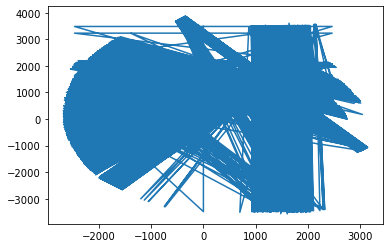

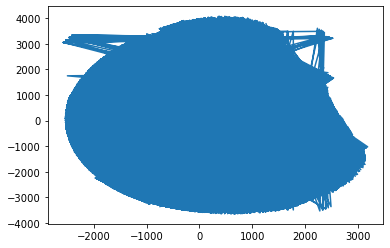

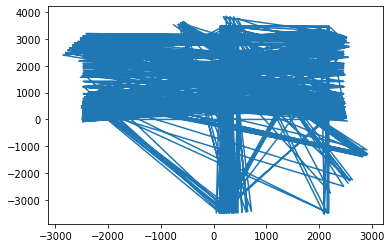

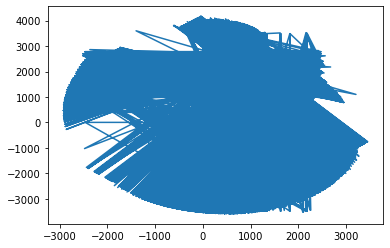

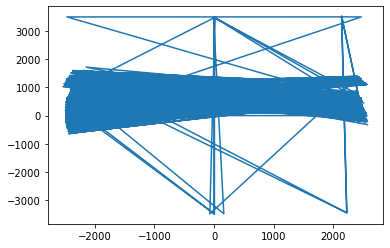

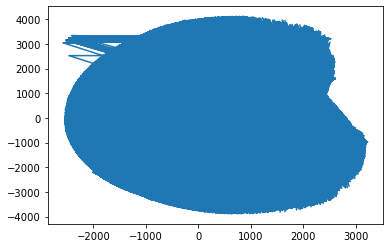

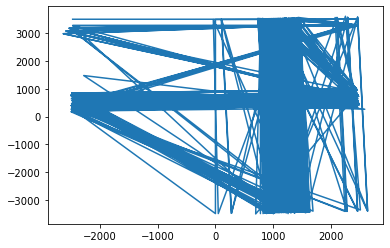

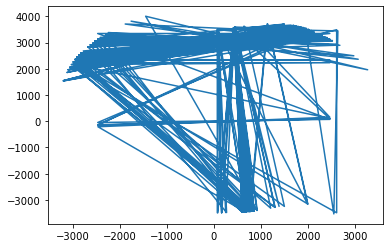

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
for n in glob.glob("Untitled Folder/*.png"):

    img = cv2.imread(n)
    file2write=open("Untitled Folder/data_xy",'w')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    arrayX = []
    arrayY = []
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2.imshow('edges', edges)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    n = 2468
    m = 3488
    
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m * (a))
        arrayX.append(x1)
        arrayX.append(x2)
        
        arrayY.append(y1)
        arrayY.append(y2)
        #cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 

    cv2.imshow('image', img)
    plt.plot(arrayX, arrayY)
    plt.show()
    #cv2.imwrite(n, img); 
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()


In [8]:
file2write=open("Untitled Folder/data_xy",'w')
file2write.write("")
file2write.close()

In [38]:
arrayX = []
arrayX.append(1)
print(arrayX)

[1]


In [41]:
arrayX.append(2)
arrayX.append(3)
arrayX.append(4)
print(arrayX)

[1, 2, 3, 4]


In [42]:
arrayX.append(3)
arrayX.append(2)
arrayX.append(1)
print(arrayX)

[1, 2, 3, 4, 3, 2, 1]


In [44]:
#Write array in file  NEEDS STRING 
file2write=open("Untitled Folder/data_xy",'w')
#file2write.write(arrayX)
file2write.close()

In [47]:
j = 2
arrayX.append(j)

print(arrayX)

[2]


In [48]:
arrayX = []

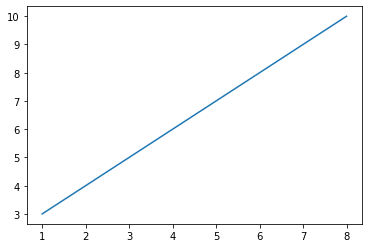

In [49]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.show()

# Plot 2 graph for 2 images 


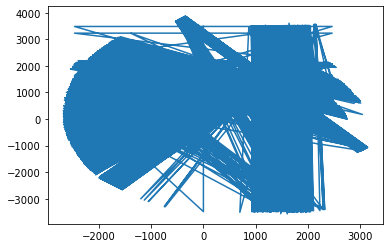

In [1]:
## PAGE 1 

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')

arrayX1 = []
arrayY1 = []
    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

n = 2468
m = 3488
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + n * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + m * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - n * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - m * (a))
    arrayX1.append(x1)
    arrayX1.append(x2)
        
    arrayY1.append(y1)
    arrayY1.append(y2)
    #cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
#cv2.imshow('image', img)
plt.plot(arrayX1, arrayY1)
plt.show()



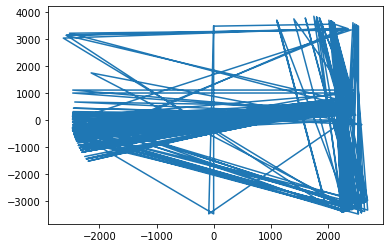

In [39]:
## PAGE 14

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')

arrayX14 = []
arrayY14 = []


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

n = 2468
m = 3488
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + n * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + m * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - n * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - m * (a))
    
    arrayX14.append(x1)
    arrayX14.append(x2)
        
    arrayY14.append(y1)
    arrayY14.append(y2)
    #cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
#cv2.imshow('image', img)
plt.plot(arrayX14, arrayY14)
plt.show()



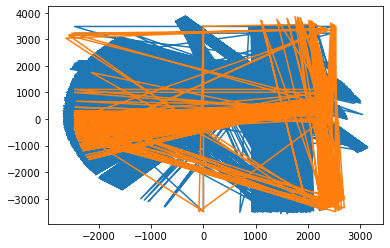

In [3]:
##Plot them on the same ? 
plt.plot(arrayX1, arrayY1, label="image 1")
plt.plot(arrayX14, arrayY14, label="image 14")
plt.show()

In [ ]:
##Array with commun data of arrayX1 Y1 and arrayX14 Y14
##This doesn't work since if a data is not commun for the X array its correponding y won't be remove from the Y array 
inter_x_1_14 = np.intersect1d(arrayX1, arrayX14)
inter_y_1_14 = np.intersect1d(arrayY1, arrayY14)
##Which result in two set of different size --> Can't be plotted 
plt.plot(inter_x_1_14, inter_y_1_14, label="Commun data of image 1 and 14") 
plt.show()

In [ ]:
##If i try to draw this ? 

In [33]:
length_x = len(inter_x_1_14)
length_y = len(inter_y_1_14)
print(length_x)
print(length_y)

77
77


In [ ]:
##Résultat non concluant 

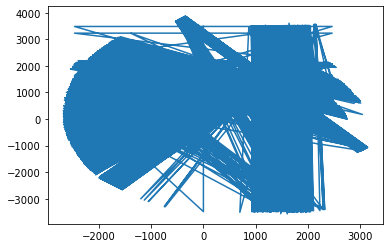

In [86]:
#I replot them excluding values (i don't remember what i mean by that...)

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')
arrayX1 = []
arrayY1 = []
    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#cv2.imshow('edges', edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

n = 2468
m = 3488
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + n * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + m * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - n * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - m * (a))
    
    arrayX1.append(x1)
    arrayX1.append(x2)
        
    arrayY1.append(y1)
    arrayY1.append(y2)
    #cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
#cv2.imshow('image', img)
#plt.axis([0, 3000, 0, 3000])
plt.plot(arrayX1, arrayY1)
plt.show()



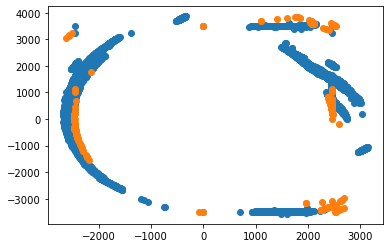

In [5]:
##Plot them on the same but dots
plt.plot(arrayX1, arrayY1,'o', label="image 1")
plt.plot(arrayX14, arrayY14,'o', label="image 14")
plt.show()

### Goal (of the following piece of code): 
--> sort lists 
--> x1 = x14 : append x1 and y1 
    x1 < x14 : remove x1  and y1
    x1 > x14 : remove x14 and y14
    until end of list of the smallest array 

In [12]:
###Our test array 
arrayA = [5,7,8,9,9]#X1
arrayB = [5,6,8,9]#X14
arrayC = [1,2,3,4,6]#Y1
arrayD = [1,2,3,5]#Y14


In [21]:
##if statement for X1 and X14 
i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayB) and i1 < len(arrayA)): 
    if arrayA[i1] == arrayB[j14]: 
        print(i1, ' ', arrayA[i1], ' in')

        
        j14 = j14 + 1 #remove y14 and y14
        i1 = i1 + 1   #remove Y1 and X1 

        
    elif arrayA[i1]  < arrayB[j14]:
        print(i1, ' ', arrayA[i1], ' smaller')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        print(j14, ' ', arrayB[j14], ' smaller')
        j14 = j14 + 1 #remove X14 and Y14
        

0   5  in
1   6  smaller
1   7  smaller
2   8  in
3   9  in


In [23]:
##if statement for same Xs and Ys
i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayB) and i1 < len(arrayA)): 
    if arrayA[i1] == arrayB[j14]: 
        print(i1, ' ', arrayA[i1], ' in')
        
        if arrayC[i1] == arrayD[j14]: 
            print(i1, ' ', arrayC[i1], ' ALL in')

        
        j14 = j14 + 1 #remove y14 and y14
        i1 = i1 + 1   #remove Y1 and X1 

        
    elif arrayA[i1]  < arrayB[j14]:
        print(i1, ' ', arrayA[i1], ' smaller')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        print(j14, ' ', arrayB[j14], ' smaller')
        j14 = j14 + 1 #remove X14 and Y14
        

0   5  in
0   1  ALL in
1   6  smaller
1   7  smaller
2   8  in
2   3  ALL in
3   9  in


In [25]:
##if statement for same Xs and Ys
i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayB) and i1 < len(arrayA)): 
    if arrayA[i1] == arrayB[j14]: 
        print(i1, ' ', arrayA[i1], ' in')
        
        if arrayC[i1] == arrayD[j14]: 
            print(i1, ' ', arrayC[i1], ' ALL in')
            j14 = j14 + 1 #remove y14 and y14
            i1 = i1 + 1   #remove Y1 and X1 
        
                    
        elif arrayC[i1] > arrayD[j14]: 
            print(j14, ' ', arrayD[j14], ' smaller')
            j14 = j14 + 1 #remove y14 and y14
        
        else: 
            print(i1, ' ', arrayC[i1], ' smaller')
            i1 = i1 + 1   #remove Y1 and X1 

    elif arrayA[i1]  < arrayB[j14]:
        print(i1, ' ', arrayA[i1], ' smaller')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        print(j14, ' ', arrayB[j14], ' smaller')
        j14 = j14 + 1 #remove X14 and Y14
        

0   5  in
0   1  ALL in
1   6  smaller
1   7  smaller
2   8  in
2   3  ALL in
3   9  in
3   4  smaller
4   9  in
3   5  smaller


In [29]:
#A X1         B X14           C Y1          D Y14

i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayB) and i1 < len(arrayA)): 
    if arrayA[i1] == arrayB[j14]: 
        
        if arrayC[i1] == arrayD[j14]: 
            inter_X.append(arrayA[i1]) #Add X1 Y1 (same as X14 Y14)
            inter_Y.append(arrayC[j14])
            j14 = j14 + 1 #remove y14 and y14
            i1 = i1 + 1   #remove Y1 and X1 
            
        elif arrayC[i1] > arrayD[j14]: 
            j14 = j14 + 1 #remove y14 and y14
        
        else: 
            i1 = i1 + 1   #remove Y1 and X1 
        
        
    elif arrayA[i1]  < arrayB[j14]:
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        j14 = j14 + 1 #remove X14 and Y14
        
    
print(inter_X)
print(inter_Y)

[5, 8]
[1, 3]


#Test finished Final version with NO degree of how close the point are 

In [33]:
#A X1         B X14           C Y1          D Y14

i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayX14) and i1 < len(arrayX1)): 
    if arrayX1[i1] == arrayX14[j14]: 
        
        if arrayY1[i1] == arrayY14[j14]: 
            inter_X.append(arrayX1[i1]) #Add X1 Y1 (same as X14 Y14)
            inter_Y.append(arrayY1[j14])
            j14 = j14 + 1 #remove y14 and y14
            i1 = i1 + 1   #remove Y1 and X1 
            
        elif arrayY1[i1] > arrayY14[j14]: 
            j14 = j14 + 1 #remove y14 and y14
        
        else: 
            i1 = i1 + 1   #remove Y1 and X1 
        
        
    elif arrayX1[i1]  < arrayX14[j14]:
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        j14 = j14 + 1 #remove X14 and Y14
        
    
print(inter_X)
print(inter_Y)

[1, 1]
[3488, -3488]


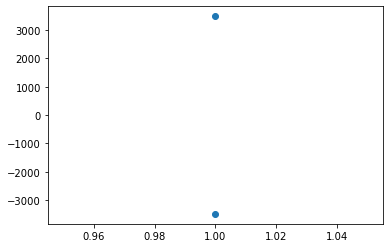

In [34]:
plt.plot(inter_X, inter_Y, 'o')
plt.show()

In [ ]:
##Something weird with the result graph

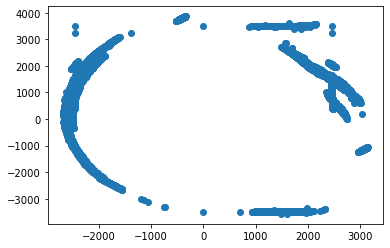

In [15]:
plt.plot(arrayX1, arrayY1,'o', label="image 1")
plt.show()

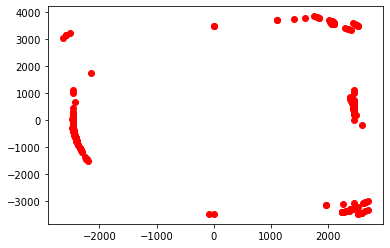

In [8]:
plt.plot(arrayX14, arrayY14,'ro', label="image 14")
plt.show()

Now, im gonna draw the line on an image 

In [39]:
#I replot them excluding values 

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')

img = cv2.line(img, (inter_X[0], inter_Y[0]), (inter_X[1], inter_Y[1]), (0, 0, 255), 2)
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14.png', img)




True

In [40]:
#I replot them excluding values 

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')

img = cv2.line(img, (inter_X[0], inter_Y[0]), (inter_X[1], inter_Y[1]), (0, 0, 255), 2)
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14.png', img)




True

## Now im gonna put a err 

In [49]:
import math
distanceX = math.sqrt((4**2) + (3**2))
print(distance)

5.0


In [3]:

import math

i1 = 0 
j14 = 0 
inter_X = []
inter_Y = []
while(j14 < len(arrayX14) and i1 < len(arrayX1)): 
    
    distanceX = abs(arrayX1[i1] - arrayX14[j14])
    
    if distanceX < 20000: 
        #print(distanceX, ' ',arrayX1[i1], ' ', arrayX14[j14])
        distanceY = abs(arrayY1[i1] - arrayY14[j14])
       
        
        if  distanceY < 20000 : 
            #print(distanceX, ' ',arrayX1[i1], ' ', arrayX14[j14])
            #print(distanceY, ' ',arrayY1[i1], ' ', arrayY14[j14])
            distance = math.sqrt((distanceX**2) + (distanceY**2))
            
            if distance < 200:
                inter_X.append(arrayX1[i1]) #Add X1 Y1 (same as X14 Y14)
                inter_Y.append(arrayY1[j14])
                j14 = j14 + 1 #remove y14 and y14
                i1 = i1 + 1   #remove Y1 and X1 

        elif arrayY1[i1] > arrayY14[j14]: 
            j14 = j14 + 1 #remove y14 and y14
        
        else: 
            i1 = i1 + 1   #remove Y1 and X1 
        
        
    elif arrayX1[i1]  < arrayX14[j14]:
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        j14 = j14 + 1 #remove X14 and Y14
        
    
print(inter_X)
print(inter_Y)

KeyboardInterrupt: 

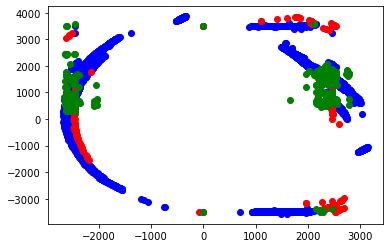

In [117]:

plt.plot(arrayX1, arrayY1,'bo', label="image 1")
plt.plot(arrayX14, arrayY14,'ro', label="image 14")
plt.plot(inter_X, inter_Y, 'go')
plt.show()

### I draw the lines 

In [101]:
len(inter_X)

24

In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')

i = 0 
while(i < len(inter_X)): 
    img = cv2.line(img, (inter_X[i], inter_Y[i]), (inter_X[i+1], inter_Y[i+1]), (0, 0, 255), 2)
    i = i+2
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14 on 14.png', img)


True

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')


i = 0 
while(i < len(inter_X)): 
    img = cv2.line(img, (inter_X[i], inter_Y[i]), (inter_X[i+1], inter_Y[i+1]), (0, 0, 255), 2)
    i = i+2
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14 on 1.png', img)

True

I remembered that page 14 is a page that is inversed , so i rotated it and re-executed the codes above.

In [14]:
print(arrayX1[30])

-2468


In [15]:
print(arrayX14[30])

438


In [ ]:
i = 0 
approx_array = []
err = 5 
while i < 77: 
    err_X = arrayX1 - arrayX14
    

In [7]:
##With rotated image 14 
import cv2
import numpy as np
import glob



img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')
img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png', img_rotate_180)


#cv2.imshow('image', img_rotate_180)
    
#cv2.imwrite(n, img); 
#k = cv2.waitKey(0) 
#cv2.destroyAllWindows()


True

## I know why it doesn't work --> tab not sorted HOWEVER we can't sort it because 2 successives data x[i] and x[i+1] (and Ys) are the ends of a line 


In [2]:
##Change threshold according to page 10
import cv2
import numpy as np
import glob

for l in range(10,200,20):
    img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')
    #img = ResizeWithAspectRatio(img, width=1920)
    #img = ResizeWithAspectRatio(img, height=800)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    #cv2.imshow('edges', edges)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100+l)

    n = 2468
    m = 3488
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + n * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + m * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - n * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - m  * (a))
        print('x1 ', x1, ' x2 ', x2 )
        print('y1 ', y1, ' y2 ', y2 )        

    



x1  1  x2  1
y1  3488  y2  -3488
x1  -2465  x2  2395
y1  -408  y2  802
x1  -2466  x2  2394
y1  -403  y2  807
x1  -2426  x2  2434
y1  -626  y2  585
x1  -2436  x2  2424
y1  -572  y2  639
x1  -2425  x2  2435
y1  -631  y2  580
x1  -2437  x2  2423
y1  -567  y2  644
x1  -2580  x2  2352
y1  3142  y2  3385
x1  -2401  x2  2459
y1  -772  y2  439
x1  -2524  x2  2410
y1  3225  y2  3347
x1  -2468  x2  2468
y1  0  y2  0
x1  -2445  x2  2415
y1  -519  y2  692
x1  2081  x2  2425
y1  3637  y2  -3321
x1  2078  x2  2422
y1  3636  y2  -3322
x1  2090  x2  2434
y1  3637  y2  -3321
x1  2085  x2  2429
y1  3637  y2  -3321
x1  2088  x2  2432
y1  3637  y2  -3321
x1  2084  x2  2343
y1  3599  y2  -3367
x1  2082  x2  2341
y1  3599  y2  -3367
x1  -2444  x2  2416
y1  -523  y2  687
x1  2074  x2  2418
y1  3636  y2  -3322
x1  2527  x2  2527
y1  3488  y2  -3488
x1  -2419  x2  2441
y1  -667  y2  543
x1  2076  x2  2420
y1  3636  y2  -3322
x1  2072  x2  2416
y1  3636  y2  -3322
x1  -2467  x2  2393
y1  -394  y2  816
x1  2538 

In [ ]:
twoDarray.append([4,3])
print(twoDarray)

In [24]:
lineArray
lineArray.append([(1,2),(2,3)])
print(lineArray)

[[[1, 2], [2, 3]], [[9, 9], [9, 3]], [[1, 2], [2, 3]], [(1, 2), (2, 3)]]


In [13]:
lineArray[0][0]

[1, 2]

In [14]:
lineArray[0][1]

[2, 3]

In [15]:
lineArray.append([[9,9],[9,3]])
print(lineArray)

[[[1, 2], [2, 3]], [[9, 9], [9, 3]]]


In [17]:
lineArray[0][1][0]

2

In [21]:
a=[[1,2,3,4]]
a.append([1,2,3,4])
print(a)

[[1, 2, 3, 4], [1, 2, 3, 4]]


In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')

arrayXY = []
    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

n = 2468
m = 3488
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + n * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + m * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - n * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - m * (a))
    arrayXY.append([[x1,y1],[x2,y2]])
    
 
print(arrayXY)



[[[1, 3488], [1, -3488]], [[-2468, 963], [2467, 964]], [[-2468, 958], [2467, 959]], [[-2468, 1607], [2467, 1608]], [[-2468, 1372], [2467, 1373]], [[2151, 3564], [2323, -3407]], [[-2468, 2007], [2467, 2008]], [[-2468, 734], [2467, 735]], [[2153, 3564], [2325, -3407]], [[-2468, 672], [2467, 673]], [[-2468, 652], [2467, 653]], [[-2468, 676], [2467, 677]], [[-2493, 1427], [2441, 1549]], [[-2468, 1497], [2467, 1498]], [[2125, 3563], [2297, -3408]], [[-2468, 753], [2467, 754]], [[-2468, 737], [2467, 738]], [[-2468, 1470], [2467, 1471]], [[-2441, 1556], [2493, 1434]], [[-2454, 820], [2480, 699]], [[-2468, 1491], [2467, 1492]], [[-2517, 1347], [2415, 1590]], [[-2517, 1350], [2415, 1593]], [[-2468, 758], [2467, 759]], [[-2468, 1319], [2467, 1320]], [[-2493, 1407], [2441, 1529]], [[-2468, 1493], [2467, 1494]], [[-2541, 1277], [2388, 1642]], [[-2455, 734], [2479, 613]], [[-2493, 1403], [2442, 1525]], [[-2414, 1620], [2518, 1377]], [[-2441, 1543], [2493, 1421]], [[-2517, 1336], [2415, 1579]], [[-2

In [53]:
sortedArrayXY_1 = arrayXY

In [54]:
sortedArrayXY_1.sort() ## Sorted it according to x1 --> [ [[x1-1,y1-1][x2-1,y2-1]],  [[x1-2,y1-2] ... ] with x1-1 < x1-2 
print(sortedArrayXY_1)

[[[-2683, 313], [2106, 2001]], [[-2682, -122], [1984, 2148]], [[-2681, 118], [2062, 2040]], [[-2681, 208], [2086, 2013]], [[-2679, 201], [2088, 2006]], [[-2678, 296], [2110, 1983]], [[-2677, 398], [2131, 1967]], [[-2676, 392], [2133, 1961]], [[-2675, -214], [1963, 2171]], [[-2674, 499], [2153, 1949]], [[-2673, 494], [2154, 1944]], [[-2672, -77], [2022, 2078]], [[-2672, 84], [2072, 2007]], [[-2671, -2], [2049, 2037]], [[-2671, 0], [2048, 2039]], [[-2669, -8], [2051, 2030]], [[-2669, 163], [2098, 1969]], [[-2668, -89], [2026, 2065]], [[-2668, 157], [2099, 1963]], [[-2667, -15], [2053, 2023]], [[-2667, 153], [2100, 1959]], [[-2667, 155], [2100, 1961]], [[-2666, 65], [2078, 1988]], [[-2665, -22], [2055, 2017]], [[-2664, 58], [2079, 1981]], [[-2664, 143], [2103, 1948]], [[-2664, 145], [2103, 1950]], [[-2663, -314], [1944, 2185]], [[-2663, -177], [2003, 2093]], [[-2663, -103], [2030, 2052]], [[-2662, -250], [1976, 2135]], [[-2662, -179], [2004, 2091]], [[-2662, -106], [2031, 2048]], [[-2662,

In [28]:
testA = [[[1,4], [2,4]]]
testB = [[[1,4], [2,4]]]


In [2]:
len(TestA)

1

In [30]:
##if statement for X1 and X14 
i1 = 0 
j14 = 0 
inter = []
while(j14 < len(TestB) and i1 < len(testA)): 
    if testA[i1][0][0] == testB[j14][0][0]: 
        #print('index ',i1, ' value', testA[i1][0][0], ' in')
        
        if testA[i1][0][1] == testB[j14][0][1]: 
            #print('index ',i1, ' value', testA[i1][0][1], ' in 2ndloop')
            
            if testA[i1][1][0] == testB[j14][1][0]: 
                #print('index ',i1, ' value', testA[i1][1][0], ' in 3dloop')
                
                if testA[i1][1][1] == testB[j14][1][1]: 
                    inter.append(testA[i1])
                    
                    j14 = j14 + 1 #remove y14 and y14
                    i1 = i1 + 1   #remove Y1 and X1 
                    
                elif  testA[i1][1][1] < testB[j14][1][1]:
                    i1 = i1 + 1   #remove X1 and y1
                else: 
                    j14 = j14 + 1 #remove X14 and Y14
                    
            elif  testA[i1][1][0] < testB[j14][1][0]:
                #print(i1, ' ', testA[i1][1][0], ' smaller ELIF 3rdloop')
                i1 = i1 + 1   #remove X1 and y1
            else:     
                #print(j14, ' ', testB[j14][1][0], ' smaller ELSE 3rloop')
                j14 = j14 + 1 #remove X14 and Y14
                
            
        elif  testA[i1][0][1] < testB[j14][0][1]:
            #print(i1, ' ', testA[i1][0][1], ' smaller ELIF 2ndloop')
            i1 = i1 + 1   #remove X1 and y1
        else:     
            #print(j14, ' ', testB[j14][0][1], ' smaller ELSE 2ndloop')
            j14 = j14 + 1 #remove X14 and Y14
            
            
            
        
    elif  testA[i1][0][0] < testB[j14][0][0]:
        #print(i1, ' ', testA[i1][0][0], ' smaller ELIF')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        print(j14, ' ', testB[j14][0][0], ' smaller ELSE')
        j14 = j14 + 1 #remove X14 and Y14
        

In [31]:
inter

[[[1, 4], [2, 4]]]

Version vith the arrays with the righ data 

In [55]:
sortedArrayXY_1

[[[-2683, 313], [2106, 2001]],
 [[-2682, -122], [1984, 2148]],
 [[-2681, 118], [2062, 2040]],
 [[-2681, 208], [2086, 2013]],
 [[-2679, 201], [2088, 2006]],
 [[-2678, 296], [2110, 1983]],
 [[-2677, 398], [2131, 1967]],
 [[-2676, 392], [2133, 1961]],
 [[-2675, -214], [1963, 2171]],
 [[-2674, 499], [2153, 1949]],
 [[-2673, 494], [2154, 1944]],
 [[-2672, -77], [2022, 2078]],
 [[-2672, 84], [2072, 2007]],
 [[-2671, -2], [2049, 2037]],
 [[-2671, 0], [2048, 2039]],
 [[-2669, -8], [2051, 2030]],
 [[-2669, 163], [2098, 1969]],
 [[-2668, -89], [2026, 2065]],
 [[-2668, 157], [2099, 1963]],
 [[-2667, -15], [2053, 2023]],
 [[-2667, 153], [2100, 1959]],
 [[-2667, 155], [2100, 1961]],
 [[-2666, 65], [2078, 1988]],
 [[-2665, -22], [2055, 2017]],
 [[-2664, 58], [2079, 1981]],
 [[-2664, 143], [2103, 1948]],
 [[-2664, 145], [2103, 1950]],
 [[-2663, -314], [1944, 2185]],
 [[-2663, -177], [2003, 2093]],
 [[-2663, -103], [2030, 2052]],
 [[-2662, -250], [1976, 2135]],
 [[-2662, -179], [2004, 2091]],
 [[-2662

Generate array for image 14 

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')

arrayXY_14 = []

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

n = 2468
m = 3488
    
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + n * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + m * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - n * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - m * (a))
    arrayXY_14.append([[x1,y1],[x2,y2]])

print(arrayXY_14)



[[[1, 3488], [1, -3488]], [[-2465, -408], [2395, 802]], [[-2466, -403], [2394, 807]], [[-2426, -626], [2434, 585]], [[-2436, -572], [2424, 639]], [[-2425, -631], [2435, 580]], [[-2437, -567], [2423, 644]], [[-2580, 3142], [2352, 3385]], [[-2401, -772], [2459, 439]], [[-2524, 3225], [2410, 3347]], [[-2468, 0], [2468, 0]], [[-2445, -519], [2415, 692]], [[2081, 3637], [2425, -3321]], [[2078, 3636], [2422, -3322]], [[2090, 3637], [2434, -3321]], [[2085, 3637], [2429, -3321]], [[2088, 3637], [2432, -3321]], [[2084, 3599], [2343, -3367]], [[2082, 3599], [2341, -3367]], [[-2444, -523], [2416, 687]], [[2074, 3636], [2418, -3322]], [[2527, 3488], [2527, -3488]], [[-2419, -667], [2441, 543]], [[2076, 3636], [2420, -3322]], [[2072, 3636], [2416, -3322]], [[-2467, -394], [2393, 816]], [[2538, 3488], [2538, -3488]], [[2070, 3636], [2414, -3322]], [[-2471, -372], [2389, 839]], [[2055, 3635], [2399, -3323]], [[2057, 3635], [2401, -3323]], [[2506, 3531], [2592, -3442]], [[2052, 3635], [2396, -3323]], 

In [67]:
arrayXY_14_sorted = arrayXY_14

In [68]:
arrayXY_14_sorted.sort()
print(arrayXY_14_sorted)

[[[-2633, 3044], [2295, 3409]], [[-2580, 3142], [2352, 3385]], [[-2580, 3153], [2352, 3396]], [[-2524, 3225], [2410, 3347]], [[-2477, -296], [2398, 794]], [[-2472, 38], [2460, 281]], [[-2471, -372], [2389, 839]], [[-2471, 29], [2461, 272]], [[-2471, 32], [2461, 275]], [[-2471, 134], [2464, 255]], [[-2471, 175], [2463, 296]], [[-2470, -377], [2390, 834]], [[-2470, -78], [2459, 286]], [[-2470, -72], [2458, 292]], [[-2470, 116], [2464, 237]], [[-2470, 123], [2464, 244]], [[-2470, 129], [2464, 250]], [[-2468, -390], [2392, 821]], [[-2468, 0], [2468, 0]], [[-2468, 219], [2467, 220]], [[-2468, 225], [2467, 226]], [[-2468, 230], [2467, 231]], [[-2468, 243], [2467, 244]], [[-2468, 254], [2467, 255]], [[-2468, 271], [2467, 272]], [[-2468, 1003], [2467, 1004]], [[-2468, 1113], [2467, 1114]], [[-2467, -394], [2393, 816]], [[-2467, -167], [2456, 319]], [[-2466, -403], [2394, 807]], [[-2466, -173], [2457, 313]], [[-2465, -408], [2395, 802]], [[-2465, -230], [2452, 377]], [[-2463, 313], [2472, 192]]

In [69]:
testA = sortedArrayXY_1
testB = arrayXY_14_sorted

In [70]:
##if statement for X1 and X14 
i1 = 0 
j14 = 0 
inter = []
while(j14 < len(testB) and i1 < len(testA)): 
    if testA[i1][0][0] == testB[j14][0][0]: 
        #print('index ',i1, ' value', testA[i1][0][0], ' in')
        
        if testA[i1][0][1] == testB[j14][0][1]: 
            #print('index ',i1, ' value', testA[i1][0][1], ' in 2ndloop')
            
            if testA[i1][1][0] == testB[j14][1][0]: 
                #print('index ',i1, ' value', testA[i1][1][0], ' in 3dloop')
                
                if testA[i1][1][1] == testB[j14][1][1]: 
                    inter.append(testA[i1])
                    
                    j14 = j14 + 1 #remove y14 and y14
                    i1 = i1 + 1   #remove Y1 and X1 
                    
                elif  testA[i1][1][1] < testB[j14][1][1]:
                    i1 = i1 + 1   #remove X1 and y1
                else: 
                    j14 = j14 + 1 #remove X14 and Y14
                    
            elif  testA[i1][1][0] < testB[j14][1][0]:
                #print(i1, ' ', testA[i1][1][0], ' smaller ELIF 3rdloop')
                i1 = i1 + 1   #remove X1 and y1
            else:     
                #print(j14, ' ', testB[j14][1][0], ' smaller ELSE 3rloop')
                j14 = j14 + 1 #remove X14 and Y14
                
            
        elif  testA[i1][0][1] < testB[j14][0][1]:
            #print(i1, ' ', testA[i1][0][1], ' smaller ELIF 2ndloop')
            i1 = i1 + 1   #remove X1 and y1
        else:     
            #print(j14, ' ', testB[j14][0][1], ' smaller ELSE 2ndloop')
            j14 = j14 + 1 #remove X14 and Y14
            
            
            
        
    elif  testA[i1][0][0] < testB[j14][0][0]:
        #print(i1, ' ', testA[i1][0][0], ' smaller ELIF')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        print(j14, ' ', testB[j14][0][0], ' smaller ELSE')
        j14 = j14 + 1 #remove X14 and Y14
        

0   -2633  smaller ELSE
1   -2580  smaller ELSE
2   -2580  smaller ELSE
3   -2524  smaller ELSE
4   -2477  smaller ELSE
5   -2472  smaller ELSE
6   -2471  smaller ELSE
7   -2471  smaller ELSE
8   -2471  smaller ELSE
9   -2471  smaller ELSE
10   -2471  smaller ELSE
11   -2470  smaller ELSE
12   -2470  smaller ELSE
13   -2470  smaller ELSE
14   -2470  smaller ELSE
15   -2470  smaller ELSE
16   -2470  smaller ELSE
27   -2467  smaller ELSE
28   -2467  smaller ELSE
29   -2466  smaller ELSE
30   -2466  smaller ELSE
31   -2465  smaller ELSE
32   -2465  smaller ELSE
33   -2463  smaller ELSE
34   -2461  smaller ELSE
35   -2461  smaller ELSE
36   -2461  smaller ELSE
40   -2452  smaller ELSE
41   -2451  smaller ELSE
42   -2449  smaller ELSE
43   -2445  smaller ELSE
53   -2437  smaller ELSE
54   -2436  smaller ELSE
59   -2428  smaller ELSE
60   -2426  smaller ELSE
62   -2419  smaller ELSE
63   -2419  smaller ELSE
64   -2418  smaller ELSE
65   -2417  smaller ELSE
70   -2402  smaller ELSE
71   -2401

In [71]:
print(inter)

[[[1, 3488], [1, -3488]]]


In [93]:
##if statement for X1 and X14 
i1 = 0 
j14 = 0 
inter = []
while(j14 < len(testB) and i1 < len(testA)): 
    
    distanceX1 = abs(testA[i1][0][0] - testB[j14][0][0])
    
    if distanceX1 < 250: 
        #print('index ',i1, ' value', testA[i1][0][0], ' in')
        
        distanceY1 = abs(testA[i1][0][1] - testB[j14][0][1])
        
        if distanceY1 < 250: 
            #print('index ',i1, ' value', testA[i1][0][1], ' in 2ndloop')
            
            distanceX2 = abs(testA[i1][1][0] - testB[j14][1][0])
            
            if distanceX2 < 250: 
                #print('index ',i1, ' value', testA[i1][1][0], ' in 3dloop')
                
                distanceY2 = abs(testA[i1][1][1] - testB[j14][1][1])
                
                if distanceY2 < 250: 
                    inter.append(testA[i1])
                    
                    j14 = j14 + 1 #remove y14 and y14
                    i1 = i1 + 1   #remove Y1 and X1 
                    
                elif  testA[i1][1][1] < testB[j14][1][1]:
                    i1 = i1 + 1   #remove X1 and y1
                else: 
                    j14 = j14 + 1 #remove X14 and Y14
                    
            elif  testA[i1][1][0] < testB[j14][1][0]:
                #print(i1, ' ', testA[i1][1][0], ' smaller ELIF 3rdloop')
                i1 = i1 + 1   #remove X1 and y1
            else:     
                #print(j14, ' ', testB[j14][1][0], ' smaller ELSE 3rloop')
                j14 = j14 + 1 #remove X14 and Y14
                
            
        elif  testA[i1][0][1] < testB[j14][0][1]:
            #print(i1, ' ', testA[i1][0][1], ' smaller ELIF 2ndloop')
            i1 = i1 + 1   #remove X1 and y1
        else:     
            #print(j14, ' ', testB[j14][0][1], ' smaller ELSE 2ndloop')
            j14 = j14 + 1 #remove X14 and Y14
            
            
            
        
    elif  testA[i1][0][0] < testB[j14][0][0]:
        #print(i1, ' ', testA[i1][0][0], ' smaller ELIF')
        i1 = i1 + 1   #remove X1 and y1
        
    else: 
        #print(j14, ' ', testB[j14][0][0], ' smaller ELSE')
        j14 = j14 + 1 #remove X14 and Y14
        

In [94]:
print(inter)

[[[-2468, 3231], [2467, 3232]], [[1, 3488], [1, -3488]], [[2123, 3563], [2295, -3408]], [[2125, 3563], [2297, -3408]], [[2147, 3525], [2233, -3449]], [[2151, 3564], [2323, -3407]], [[2153, 3564], [2325, -3407]]]


### Let's plot this

In [95]:
inter_x = []
inter_y = []
i = 0
while(i < len(inter)): 
    inter_x.append(inter[i][0][0])
    inter_x.append(inter[i][1][0])
    
    inter_y.append(inter[i][0][1])
    inter_y.append(inter[i][1][1])
    
    i=i+1

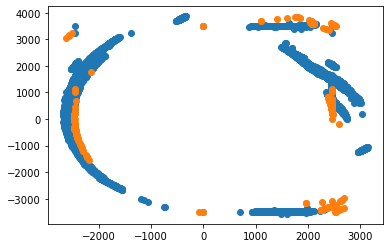

In [96]:
plt.plot(arrayX1, arrayY1,'o', label="image 1")
plt.plot(arrayX14, arrayY14,'o', label="image 14")
plt.show()

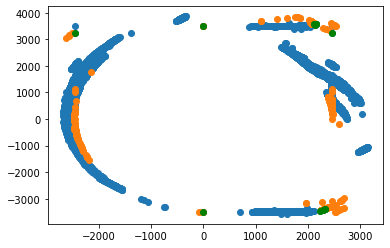

In [106]:
plt.plot(arrayX1, arrayY1,'o', label="image 1")
plt.plot(arrayX14, arrayY14,'o', label="image 14")
plt.plot(inter_x,inter_y,'go')
plt.show()

In [99]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/014=20200818_10255214___AFR695537_t274191_EasyPVR.png')

i = 0 
while(i < len(inter_x)): 
    img = cv2.line(img, (inter_x[i], inter_y[i]), (inter_x[i+1], inter_y[i+1]), (0, 0, 255), 2)
    i = i+2
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14 on 14.png', img)


True

In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Untitled Folder/001=20200818_10255201___AFR695537_t274191_EasyPVR.png')

i = 0 
while(i < len(inter_x)): 
    img = cv2.line(img, (inter_x[i], inter_y[i]), (inter_x[i+1], inter_y[i+1]), (0, 0, 255), 2)
    i = i+2
 

cv2.imwrite('Untitled Folder/Commun_line_btw_1_14 on 1.png', img)


True